In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

In [0]:
from sklearn.datasets import load_iris

iris_db = load_iris()
data = iris_db.data
targets = iris_db.target

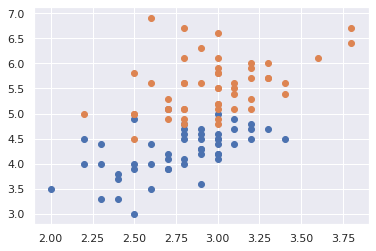

In [31]:
X = data[50:, 1:3]
y = (targets == 2).astype(int)[50:]

X1 = X[ y == 1]
X0 = X[ y == 0]
plt.scatter(X0[:, 0], X0[:, 1])
plt.scatter(X1[:, 0], X1[:, 1])

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_ = KNeighborsClassifier()
knn_.fit(X_train, y_train)
y_pred = knn_.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0])

In [34]:
def get_indexes(y_test, y_pred):
    idx_correct = np.where(y_pred == y_test)
    idx_incorrect = np.where(y_pred != y_test)
    idx_0 = np.where(y_test == 0)
    idx_1 = np.where(y_test == 1)

    idx_correct_0 = np.intersect1d(idx_correct, idx_0)
    idx_correct_1 = np.intersect1d(idx_correct, idx_1)
    idx_incorrect_0 = np.intersect1d(idx_incorrect, idx_0)
    idx_incorrect_1 = np.intersect1d(idx_incorrect, idx_1)

    return idx_correct_0, idx_correct_1, idx_incorrect_0, idx_incorrect_1

get_indexes(y_test, y_pred)


(array([ 1,  3,  5,  6,  8, 11, 12, 17, 18, 19, 22, 24]),
 array([ 0,  2,  4,  7,  9, 10, 13, 15, 16, 20]),
 array([21, 23]),
 array([14]))

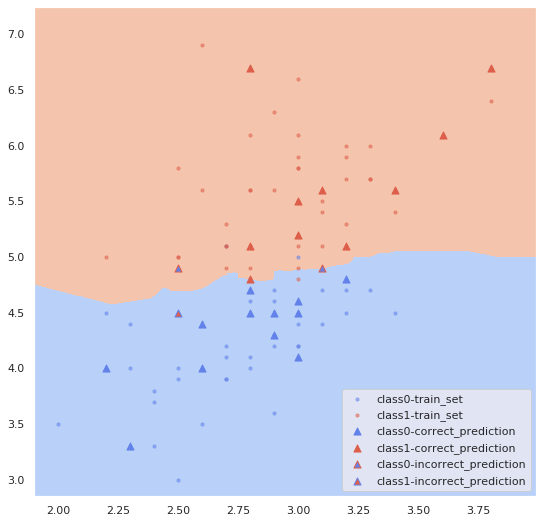

In [40]:
from matplotlib.colors import ListedColormap

cp = sns.color_palette("coolwarm", 7)
my_cmap = ListedColormap([cp[2], cp[-3]]) 

idx = get_indexes(y_test, y_pred)

X_train_0 = X_train[ y_train == 0]
X_train_1 = X_train[ y_train == 1]


X_correct_0 = X_test[idx[0]]
X_correct_1 = X_test[idx[1]]
X_incorrect_0 = X_test[idx[2]]
X_incorrect_1 = X_test[idx[3]]

x_min, x_max = min(X[:, 0]) * 0.95, max(X[:, 0]) * 1.05
y_min, y_max = min(X[:, 1]) * 0.95, max(X[:, 1]) * 1.05
step = 1000

xx, yy = np.meshgrid(np.linspace(x_min, x_max, step), np.linspace(y_min, y_max, step))
Z = knn_.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(9, 9))
ax.pcolormesh(xx, yy, Z, cmap=my_cmap)

ax.scatter(X_train_0[:, 0], X_train_0[:, 1], color=cp[0], alpha=0.5, s=10, label='class0-train_set')
ax.scatter(X_train_1[:, 0], X_train_1[:, 1], color=cp[-1], alpha=0.5, s=10, label='class1-train_set')

ax.scatter(X_correct_0[:, 0], X_correct_0[:, 1], color=cp[0], marker='^', s=50, label='class0-correct_prediction')
ax.scatter(X_correct_1[:, 0], X_correct_1[:, 1], color=cp[-1], marker='^', s=50, label='class1-correct_prediction')

ax.scatter(X_incorrect_0[:, 0], X_incorrect_0[:, 1], color=cp[0], marker='^', s=50, edgecolors=cp[-1], label='class0-incorrect_prediction')
ax.scatter(X_incorrect_1[:, 0], X_incorrect_1[:, 1], color=cp[-1], marker='^', s=50, edgecolors=cp[0], label='class1-incorrect_prediction')


ax.legend()


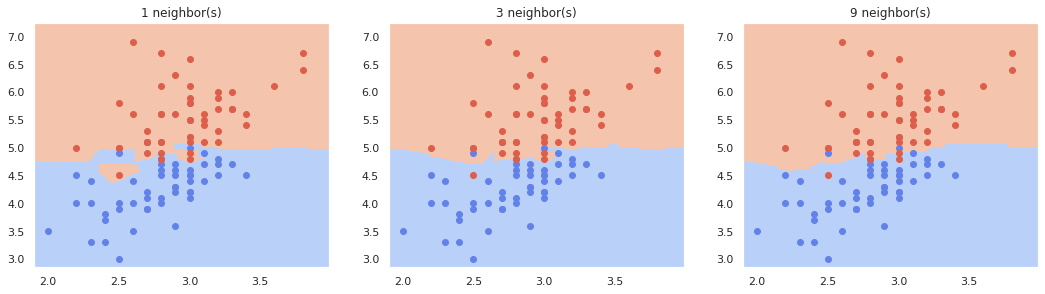

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4.5))
neighbors = [1, 3, 9]

X_0 = X[np.where(y==0)]
X_1 = X[np.where(y==1)]
x_min, x_max = min(X[:, 0]) * 0.95, max(X[:, 0]) * 1.05
y_min, y_max = min(X[:, 1]) * 0.95, max(X[:, 1]) * 1.05
step = 100

for i, n in enumerate(neighbors):
    knn_ = KNeighborsClassifier(n_neighbors=n)
    knn_.fit(X, y)
    
    linspace = np.linspace(2.75, 7, 500)
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, step), np.linspace(y_min, y_max, step))
    Z = knn_.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[i].pcolormesh(xx, yy, Z, cmap=my_cmap)

    axes[i].scatter(X_0[:, 0], X_0[:, 1], color=cp[0], label='class0')
    axes[i].scatter(X_1[:, 0], X_1[:, 1], color=cp[-1], label='class1')
    axes[i].set_title(f'{n} neighbor(s)')


